## ニューラルネットワークで問題を解く

### 1.4.1　スパイラル・データセット

In [8]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [9]:
x, t = spiral.load_data()
print("x", x.shape)
print("t", t.shape)

x (300, 2)
t (300, 3)


### 1.4.2　ニューラルネットワークの実装

In [10]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの作成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 全ての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout    

### 1.4.3　学習用のソースコード

In [11]:
import numpy as np
from common.optimizer import SGD
from dataset import spiral

In [12]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [13]:
# データの読み込み、モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [15]:
# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []
for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
    
        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f' % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 0.11
| epoch 2 | iter 10 / 10 | loss 0.11
| epoch 3 | iter 10 / 10 | loss 0.11
| epoch 4 | iter 10 / 10 | loss 0.11
| epoch 5 | iter 10 / 10 | loss 0.11
| epoch 6 | iter 10 / 10 | loss 0.11
| epoch 7 | iter 10 / 10 | loss 0.10
| epoch 8 | iter 10 / 10 | loss 0.10
| epoch 9 | iter 10 / 10 | loss 0.11
| epoch 10 | iter 10 / 10 | loss 0.11
| epoch 11 | iter 10 / 10 | loss 0.10
| epoch 12 | iter 10 / 10 | loss 0.11
| epoch 13 | iter 10 / 10 | loss 0.10
| epoch 14 | iter 10 / 10 | loss 0.11
| epoch 15 | iter 10 / 10 | loss 0.11
| epoch 16 | iter 10 / 10 | loss 0.10
| epoch 17 | iter 10 / 10 | loss 0.10
| epoch 18 | iter 10 / 10 | loss 0.11
| epoch 19 | iter 10 / 10 | loss 0.10
| epoch 20 | iter 10 / 10 | loss 0.10
| epoch 21 | iter 10 / 10 | loss 0.10
| epoch 22 | iter 10 / 10 | loss 0.10
| epoch 23 | iter 10 / 10 | loss 0.10
| epoch 24 | iter 10 / 10 | loss 0.10
| epoch 25 | iter 10 / 10 | loss 0.10
| epoch 26 | iter 10 / 10 | loss 0.10
| epoch 27 | iter 10 

### 1.4.4　Trainerクラス

In [17]:
import sys
sys.path.append("..")
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

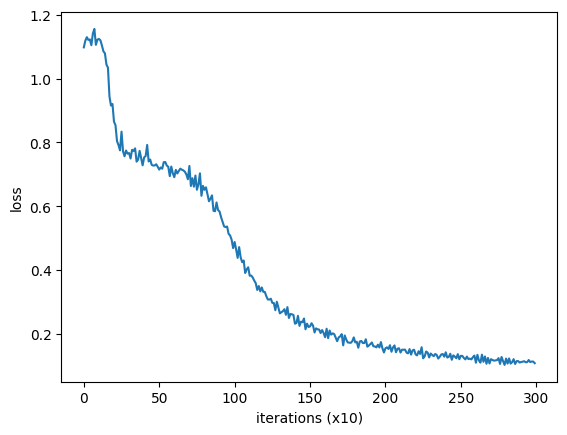

In [18]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()